In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from pathlib import Path
from sklearn.metrics import accuracy_score

In [3]:
from keras.models import Sequential


# Method 1: Feature Extraction without Fine-tuning


In [4]:
# Define data directories
train_dir = 'C:/Users/abidm/Downloads/roof type classification model/train'
test_dir = 'C:/Users/abidm/Downloads/roof type classification model/test'
validation_dir = 'C:/Users/abidm/Downloads/roof type classification model/valid'


In [5]:
# Set image size and batch size
img_width, img_height = 224, 224
batch_size = 32

In [6]:
# Set up data generators
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 170 images belonging to 3 classes.
Found 38 images belonging to 3 classes.


In [7]:
# Load the VGG19 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [8]:
# Create a new model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # For 3 classes


In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,  # You can adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/50
5/5 [==============================] - 66s 13s/step - loss: 1.3546 - accuracy: 0.3688 - val_loss: 0.8838 - val_accuracy: 0.5625
Epoch 2/50
5/5 [==============================] - 65s 13s/step - loss: 0.3830 - accuracy: 0.8562 - val_loss: 1.5334 - val_accuracy: 0.5938
Epoch 3/50
5/5 [==============================] - 70s 14s/step - loss: 0.3258 - accuracy: 0.8938 - val_loss: 0.7285 - val_accuracy: 0.6875
Epoch 4/50
5/5 [==============================] - 74s 16s/step - loss: 0.1072 - accuracy: 0.9625 - val_loss: 0.6043 - val_accuracy: 0.8125
Epoch 5/50
5/5 [==============================] - 65s 13s/step - loss: 0.0481 - accuracy: 0.9855 - val_loss: 0.6836 - val_accuracy: 0.7500
Epoch 6/50
5/5 [==============================] - 68s 13s/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 2.4004 - val_accuracy: 0.5938
Epoch 7/50
5/5 [==============================] - 65s 13s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 2.7368 - val_accuracy: 0.6562
Epoch 8/50
5/5 [===========

In [10]:
# Save the model
model.save('C:/Users/abidm/Downloads/roof type classification model/roof_type_vgg19_model.h5')

In [11]:
# Load the saved model
from keras.models import load_model
model = load_model('C:/Users/abidm/Downloads/roof type classification model/roof_type_vgg19_model.h5')



In [12]:
# Set up the test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)  # Make sure to set shuffle to False

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

Found 47 images belonging to 3 classes.
2/2 [==============================] - 32s 8s/step - loss: 1.0496 - accuracy: 0.5532
Test accuracy: 0.5531914830207825


In [18]:
import numpy as np
from keras.preprocessing import image

# Load the saved model
from keras.models import load_model
model = load_model('C:/Users/abidm/Downloads/roof type classification model/roof_type_vgg19_model.h5')

# Define a function to preprocess the image
def preprocess_img(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array



The predicted class is: tile


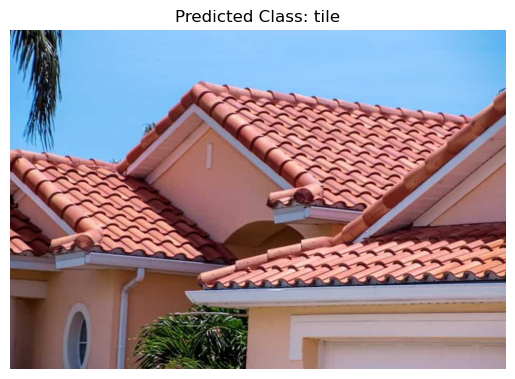

In [19]:
import matplotlib.pyplot as plt
# Browse the path of a new image
new_img_path = 'C:/Users/abidm/Downloadsroof type classification model/tile-roof.jpeg'  # Replace with the path to your new image

preprocessed_img = preprocess_img(new_img_path)

# Make a prediction
prediction = model.predict(preprocessed_img)

# Map the prediction to the class labels
class_labels = {0: 'asphalt', 1: 'tile', 2: 'metal'}  # Replace with your class labels
predicted_class = np.argmax(prediction)

print(f'The predicted class is: {class_labels[predicted_class]}')
# Display the image
img = image.load_img(new_img_path)
plt.imshow(img)
plt.title(f'Predicted Class: {class_labels[predicted_class]}')
plt.axis('off')
plt.show()

The predicted class is: asphalt


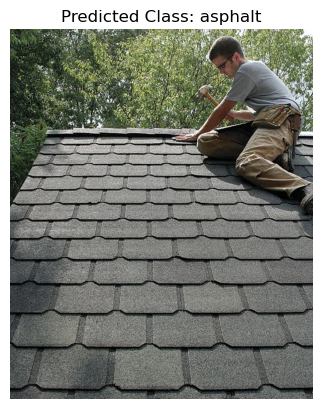

In [29]:
# Browse the path of a new image
new_img_path = 'C:/Users/abidm/Downloads/roof type classification model/asphalt.jpeg'  # Replace with the path to your new image
preprocessed_img = preprocess_img(new_img_path)

# Make a prediction
prediction = model.predict(preprocessed_img)

# Map the prediction to the class labels
class_labels = {0: 'asphalt', 1: 'tile', 2: 'metal'}  # Replace with your class labels
predicted_class = np.argmax(prediction)

print(f'The predicted class is: {class_labels[predicted_class]}')

# Display the image
img = image.load_img(new_img_path)
plt.imshow(img)
plt.title(f'Predicted Class: {class_labels[predicted_class]}')
plt.axis('off')
plt.show()

In [2]:
!pip install seaborn

     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ------------------ ------------------- 163.8/341.8 kB 5.0 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   --------------------------------------- 294.6/294.6 kB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   - -------------------------------------- 0.4/10.8 MB 11.6 MB/s eta 0:00:01
   -- ------------------------------------- 0.5/10.8 MB 6.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/10.8 MB 5.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/10.8 MB 5.9 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/10.8 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/10.8 MB 4.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.8 MB 4.1 MB/s eta 0:00:03
   ---

In [21]:
from keras.preprocessing.image import ImageDataGenerator


In [13]:
# Set up data generators
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Set up the test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)  # Make sure to set shuffle to False


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')


Found 47 images belonging to 3 classes.
2/2 [==============================] - 30s 8s/step - loss: 1.0496 - accuracy: 0.5532
Test accuracy: 0.5531914830207825


# Method 2: Fine-tuning


In [23]:
# Load the VGG16 model with pre-trained weights and without the top layers
base_model_ft = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))



In [67]:

# Unfreeze the last two convolutional layers
for layer in base_model_ft.layers[-2:]:
    layer.trainable = True

# Create a new model
vgg_model_ft = Sequential()
vgg_model_ft.add(base_model_ft)
vgg_model_ft.add(Flatten())
vgg_model_ft.add(Dense(256, activation='relu'))
vgg_model_ft.add(Dropout(0.5))
vgg_model_ft.add(Dense(3, activation='softmax'))  # Assuming 3 classes

# Compile the model
vgg_model_ft.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [69]:
vgg_model_ft.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000002004F92E4C0>>

In [68]:
# Train the model with fine-tuning
history = vgg_model_ft.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,  # You can adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)



Epoch 1/50
5/5 [==============================] - 53s 12s/step - loss: 1.3579 - accuracy: 0.4638 - val_loss: 0.9007 - val_accuracy: 0.6250
Epoch 2/50
5/5 [==============================] - 56s 13s/step - loss: 0.4889 - accuracy: 0.8406 - val_loss: 0.6440 - val_accuracy: 0.7812
Epoch 3/50
5/5 [==============================] - 56s 11s/step - loss: 0.1143 - accuracy: 0.9638 - val_loss: 0.7710 - val_accuracy: 0.7188
Epoch 4/50
5/5 [==============================] - 55s 11s/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.3671 - val_accuracy: 0.7188
Epoch 5/50
5/5 [==============================] - 56s 11s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.7971 - val_accuracy: 0.7188
Epoch 6/50
5/5 [==============================] - 55s 13s/step - loss: 5.1265e-05 - accuracy: 1.0000 - val_loss: 0.9941 - val_accuracy: 0.7500
Epoch 7/50
5/5 [==============================] - 55s 11s/step - loss: 2.2683e-04 - accuracy: 1.0000 - val_loss: 1.8866 - val_accuracy: 0.6875
Epoch 8/50
5/5 [===

In [70]:
# Save the model
vgg_model_ft.save('C:/Users/abidm/Downloads/roof type classification model/vgg_model_ft.h5')



In [24]:
# Load the saved model
from keras.models import load_model
model_ft = load_model('C:/Users/abidm/Downloads/roof type classification model/vgg_model_ft.h5')

In [72]:
# Evaluate the model on the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_loss, test_accuracy = model_ft.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

Found 47 images belonging to 3 classes.
2/2 [==============================] - 4s 1s/step - loss: 0.7128 - accuracy: 0.8511
Test accuracy: 0.8510638475418091


In [25]:
import numpy as np
from keras.preprocessing import image

# Load the saved model
from keras.models import load_model
model = load_model('C:/Users/abidm/Downloads/roof type classification model/vgg_model_ft.h5')

# Define a function to preprocess the image
def preprocess_img(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array



Found 47 images belonging to 3 classes.
2/2 [==============================] - 4s 1s/step - loss: 0.7128 - accuracy: 0.8511
Test accuracy: 0.8510638475418091
2/2 [==============================] - 4s 1s/step


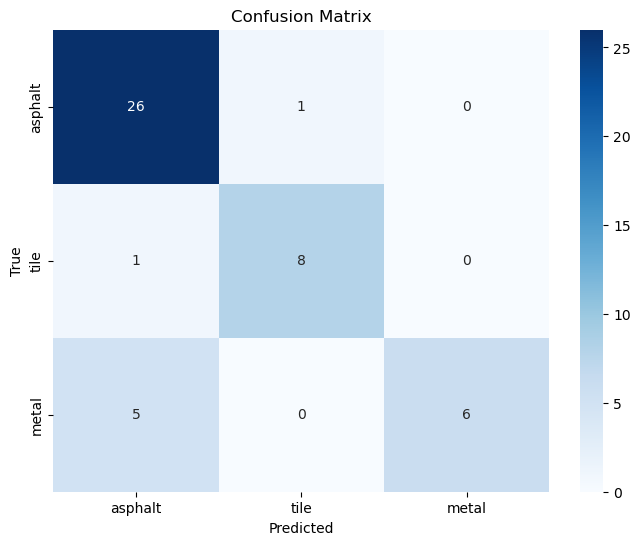

Classification Report:
              precision    recall  f1-score   support

     asphalt       0.81      0.96      0.88        27
        tile       0.89      0.89      0.89         9
       metal       1.00      0.55      0.71        11

    accuracy                           0.85        47
   macro avg       0.90      0.80      0.83        47
weighted avg       0.87      0.85      0.84        47



In [27]:
# Set up data generators
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Set up the test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)  # Make sure to set shuffle to False


# Evaluate the model on the test data
test_loss, test_accuracy = model_ft.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

# Get true labels and predictions
true_labels = test_generator.classes
num_batches = len(test_generator)
predictions = model_ft.predict(test_generator, steps=num_batches, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_labels.values()))
